In [32]:
#initiate the layer sizes depending on the input and output values and our choice of hidden layer size
def layer_sizes(x, n_h, y):
    n_x=x.shape[1]
    n_h=4
    n_y=y.shape[1]
    
    return n_x, n_h, n_y

In [33]:
#our function to initialize weights
import numpy as np

def initialize_weights(n_x, n_h, n_y):
    W1 = np.random.rand(n_x, n_h)
    W2 = np.random.rand(n_h, n_y)
    return W1, W2

In [34]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [35]:
def sigmoid_derivative(x): 
  return x * (1 - x)

In [36]:
#forward function
def forward(x, W1, W2):
    
    Z1 = np.dot(x,W1) #first layer linear forward
    A1 = sigmoid(Z1) #first layer activation
    
    Z2 = np.dot(A1,W2) #output linear forward
    output = sigmoid(Z2) #activation output layer
    
    return output, A1

In [37]:
#backward propagation
def backward(x, y, A1, output, W1, W2):
    #calculate gradients
    d_w2 = np.dot(A1.T, (2*(y - output) * sigmoid_derivative(output)))
    d_w1 = np.dot(x.T,  (np.dot(2*(y - output) * sigmoid_derivative(output), W2.T) * sigmoid_derivative(A1)))
    #update weights
    W2+=d_w2
    W1+=d_w1
    #return updated weights
    return W1,W2

In [39]:
#Training
#breast cancer dataset from the sklearn.datasets module
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
#preprocessing
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=y.reshape(X.shape[0],1)

n_x, n_h, n_y = layer_sizes(X, 4, y) #initiate layer sizes
W1, W2 = initialize_weights(n_x, n_h, n_y) #initialize weights
loss=[]
epochs=1000
m=X.shape[0]
for i in range(epochs):
    output, A1 = forward(X, W1, W2)
    iter_loss=(1/(2*m))*np.sum((y-output)**2)
    loss.append(iter_loss)
    W1, W2 = backward(X, y, A1, output, W1, W2)
    print(loss)

[0.2069957888820374]
[0.2069957888820374, 0.25715478838057476]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136, 0.1280904142662587]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136, 0.1280904142662587, 0.12174147191623029]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136, 0.1280904142662587, 0.12174147191623029, 0.11636161642572426]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136, 0.1280904142662587, 0.12174147191623029, 0.11636161642572426, 0.1131602839035039]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.1313537531813136, 0.1280904142662587, 0.12174147191623029, 0.11636161642572426, 0.1131602839035039, 0.10894036724050847]
[0.2069957888820374, 0.25715478838057476, 0.1453390340998196, 0.13135375318

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



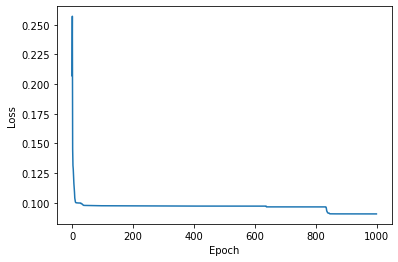

In [46]:
from matplotlib import pyplot as plt
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
